In [26]:
%run tools.ipynb

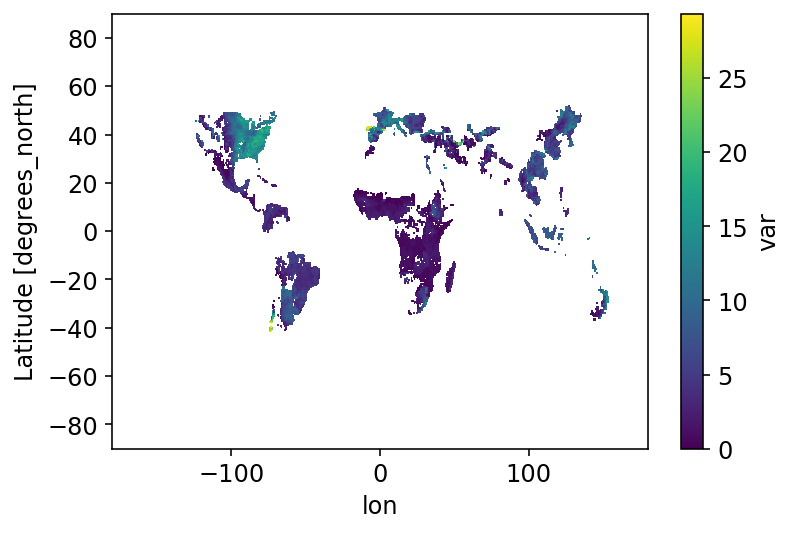

In [41]:
# yield
selected_crops = ['maize_major', 'maize_second', 'rice_major', 'rice_second', 'wheat_spring', 'wheat_winter', 'soybean']

fname = "../data/gdhy_v1.2_v1.3_20190128/" + selected_crops[0] + "/yield_2016.nc4"
ds = xr.open_dataset(fname)
ds['lon'] = ds['lon'] - 180.
crop_yield = ds['var'].copy()
crop_yield[:,:359] = ds['var'][:,361:].values
crop_yield[:,361:] = ds['var'][:,:359].values
crop_yield.plot()

In [42]:
lon1 = -180
lon2 = 180
lat1 = -60
lat2 = 70

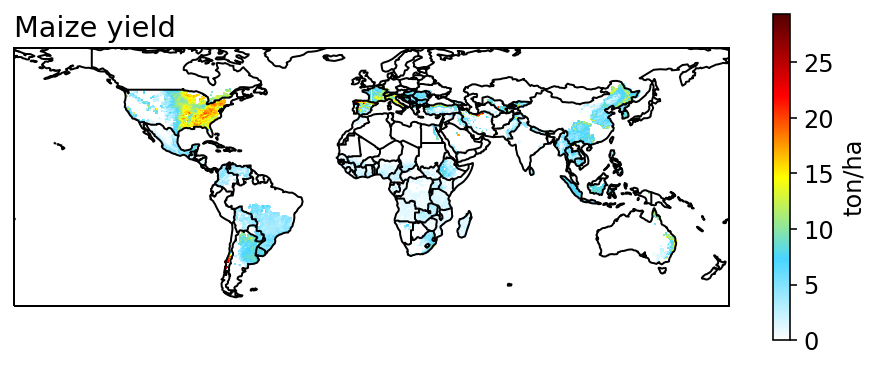

In [43]:
import cartopy.feature as cfeature

fig = plt.figure(figsize=[8, 6])
proj=ccrs.PlateCarree()
ax = plt.subplot(111, projection=proj)
ax.coastlines()
crop_yield.plot(ax = ax,
                  transform=ccrs.PlateCarree(), 
                  cmap=WhGrYlRd, 
                  #vmin = 200,
                  #vmax = 320,
                  cbar_kwargs={'shrink': 0.5, 'label': 'ton/ha'})

ax.set_xlim(lon1,lon2)
ax.set_ylim(lat1,lat2)
ax.set_title('Maize yield', loc = 'left')
ax.add_feature(cfeature.BORDERS)

out_dir = '/Users/mehliyarsadiq/Desktop/ozone_crop_China/figures/'
#fig.savefig(out_dir + 'harvest_date_China.png', dpi = 300, bbox_inches = "tight")


In [44]:
# save all of them as one netcdf
ds_out = crop_yield.to_dataset(name = selected_crops[0])

for i in range(1, len(selected_crops)):
    fname = "../data/gdhy_v1.2_v1.3_20190128/" + selected_crops[i] + "/yield_2016.nc4"
    ds = xr.open_dataset(fname)
    ds['lon'] = ds['lon'] - 180.
    crop_yield = ds['var'].copy()
    crop_yield[:,:359] = ds['var'][:,361:].values
    crop_yield[:,361:] = ds['var'][:,:359].values
    
    ds_out[selected_crops[i]] = crop_yield

In [45]:
ds_out

<xarray.Dataset>
Dimensions:       (lat: 360, lon: 720)
Coordinates:
  * lon           (lon) float64 -179.8 -179.2 -178.8 ... 178.8 179.2 179.8
  * lat           (lat) float64 -89.75 -89.25 -88.75 ... 88.75 89.25 89.75
Data variables:
    maize_major   (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan
    maize_second  (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan
    rice_major    (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan
    rice_second   (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan
    wheat_spring  (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan
    wheat_winter  (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan
    soybean       (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan

In [46]:
ds_out.to_netcdf('../data/crop/crop_yield.nc')

In [47]:
selected_crops

['maize_major',
 'maize_second',
 'rice_major',
 'rice_second',
 'wheat_spring',
 'wheat_winter',
 'soybean']

In [48]:
lon1 = -160
lon2 = 160
lat1 = -60
lat2 = 60

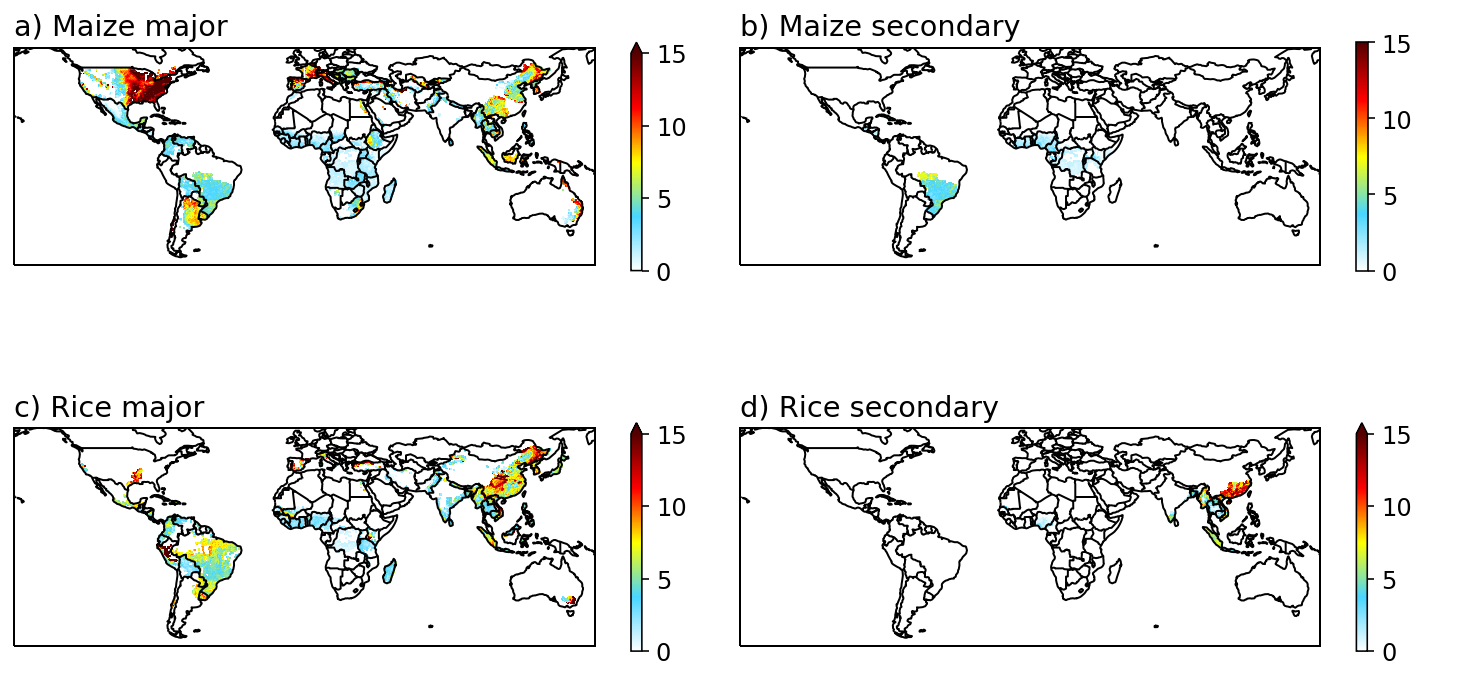

In [49]:

titles = ['a) Maize major', 'b) Maize secondary', 'c) Rice major', 'd) Rice secondary', 
          'e) Spring wheat', 'f) Winter wheat', 'g) Soybean']

# figure 1, distribution
fig, axes = plt.subplots(2, 2, 
                             figsize=[13, 7], 
                             subplot_kw={'projection': ccrs.PlateCarree()},
                             gridspec_kw={'hspace': 0, 'wspace': 0})
axes = axes.ravel()

for i in range(4): #range(len(selected_crops)):
    axes[i].coastlines()
    ds_out[selected_crops[i]].plot(ax = axes[i],
                      transform=ccrs.PlateCarree(), 
                      cmap=WhGrYlRd, 
                      vmin = 0,
                      vmax = 15,
                      cbar_kwargs={'shrink': 0.6, 'label': ' '})

    axes[i].set_xlim(lon1,lon2)
    axes[i].set_ylim(lat1,lat2)
    axes[i].set_title(titles[i], loc = 'left')
    axes[i].add_feature(cfeature.BORDERS)

out_dir = '/Users/mehliyarsadiq/Desktop/ozone_crop/outputs/figures/global/'
fig.savefig(out_dir + 'crop_yield_global1.png', dpi = 300, bbox_inches = "tight")


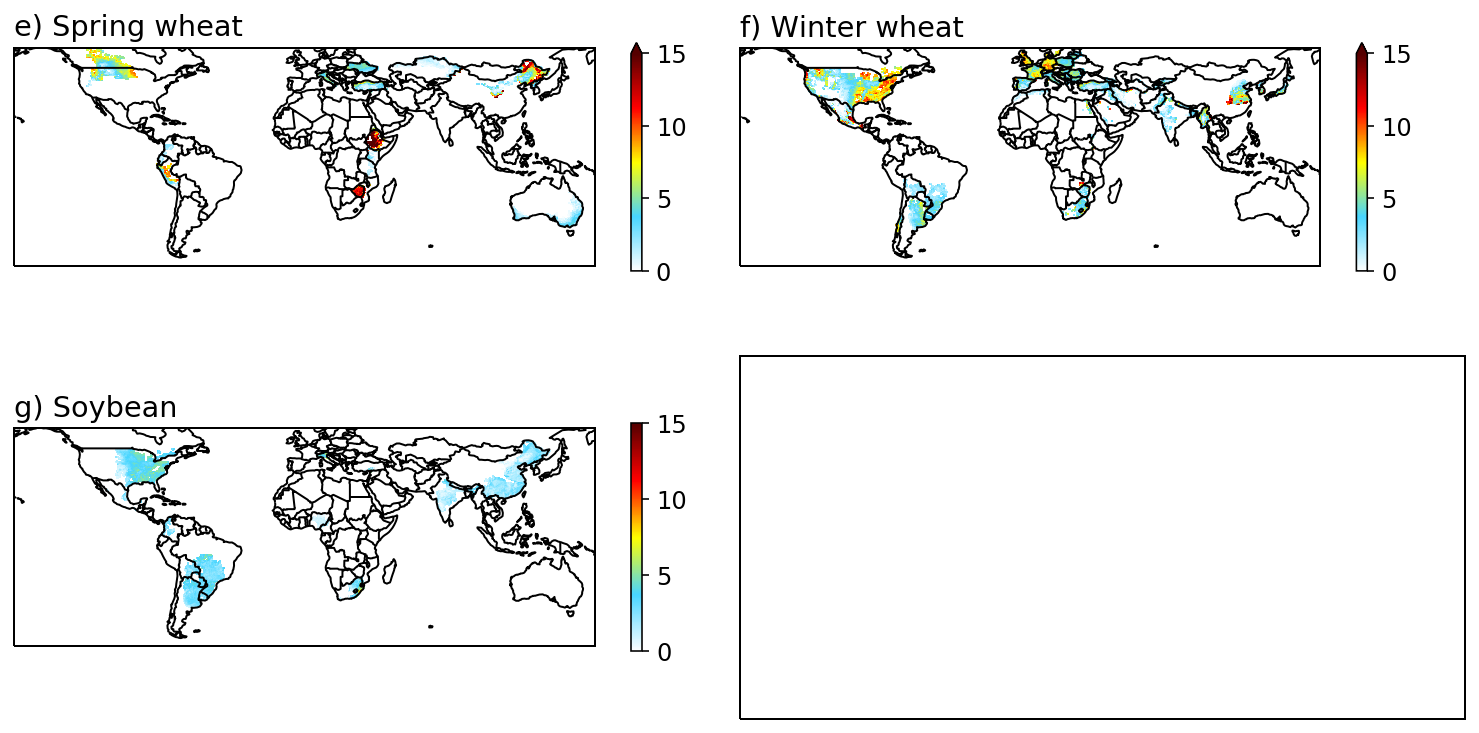

In [50]:

# figure 1, distribution
fig, axes = plt.subplots(2, 2, 
                             figsize=[13, 7], 
                             subplot_kw={'projection': ccrs.PlateCarree()},
                             gridspec_kw={'hspace': 0, 'wspace': 0})
axes = axes.ravel()

for i in range(len(selected_crops) - 4): #range(len(selected_crops)):
    axes[i].coastlines()
    ds_out[selected_crops[i+4]].plot(ax = axes[i],
                      transform=ccrs.PlateCarree(), 
                      cmap=WhGrYlRd, 
                      vmin = 0,
                      vmax = 15,
                      cbar_kwargs={'shrink': 0.6, 'label': ' '})

    axes[i].set_xlim(lon1,lon2)
    axes[i].set_ylim(lat1,lat2)
    axes[i].set_title(titles[i+4], loc = 'left')
    axes[i].add_feature(cfeature.BORDERS)

out_dir = '/Users/mehliyarsadiq/Desktop/ozone_crop/outputs/figures/global/'
fig.savefig(out_dir + 'crop_yield_global2.png', dpi = 300, bbox_inches = "tight")


In [51]:
# regrid an xarray dataarray from finer resolution to coarser resolution (res)
# dr is the dataarray
def regrid_fine_to_coarse_mean_dr(dr, target, res_lat, res_lon):
    target_copy = target.copy()
    for ilon, lon in enumerate(target['lon'].values):
        for ilat, lat in enumerate(target['lat'].values):
            subset = dr.sel(lat=slice(lat-res_lat/2,lat+res_lat/2), lon = slice(lon-res_lon/2,lon+res_lon/2))
            target_copy[ilat,ilon] = subset.mean().values
    
    return target_copy


In [52]:
ds_out

<xarray.Dataset>
Dimensions:       (lat: 360, lon: 720)
Coordinates:
  * lon           (lon) float64 -179.8 -179.2 -178.8 ... 178.8 179.2 179.8
  * lat           (lat) float64 -89.75 -89.25 -88.75 ... 88.75 89.25 89.75
Data variables:
    maize_major   (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan
    maize_second  (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan
    rice_major    (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan
    rice_second   (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan
    wheat_spring  (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan
    wheat_winter  (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan
    soybean       (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan

In [53]:
# target array to interpolate to
fname = '../data/ozone/moch/GCHP.Health_hr.5Yavg_SpeciesConc_O3_2x25.nc4'
ds_tmp = xr.open_dataset(fname)

# target data array
dr_target = xr.DataArray(
            data=np.nan,
            dims=["lat", "lon"],
            coords=dict(
            lon=ds_tmp.lon,
            lat=ds_tmp.lat
    ))
# target dataset
ds_out_regrid = dr_target.to_dataset(name = selected_crops[0])
ds_out_regrid
for i in range(1, len(selected_crops)): ds_out_regrid[selected_crops[i]] = dr_target.copy()
    
#ds_out_regrid

In [54]:
for i in range(len(selected_crops)): 
    ds_out_regrid[selected_crops[i]] = regrid_fine_to_coarse_mean_dr(ds_out[selected_crops[i]], dr_target, 2., 2.5)
    

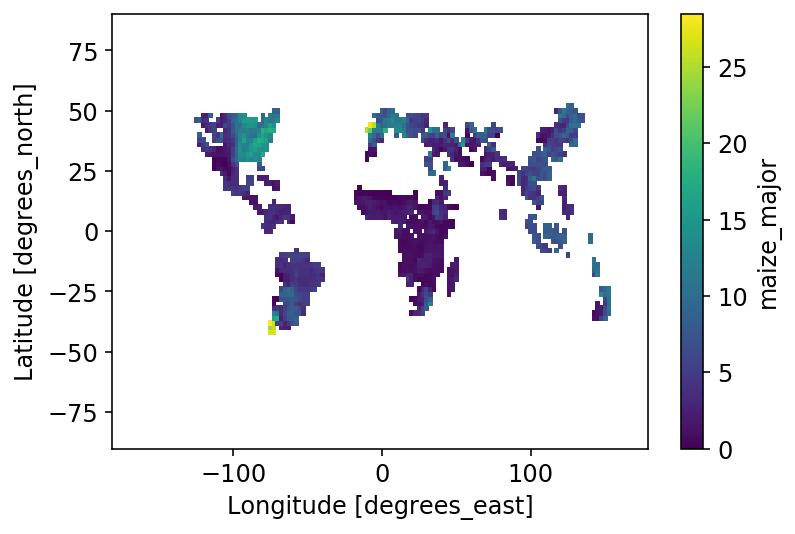

In [55]:
ds_out_regrid['maize_major'].plot()

In [58]:
ds_out_regrid.to_netcdf('../data/crop/crop_yield_2x2.5.nc')